In [ ]:
# Задача

#     Запустите A/A-тест
#     Посчитайте FPR на уровне альфа = 0.05 (ставьте подвыборки без возвращения объемом 1000). 
#     Вы увидите, что FPR > альфа! Нам нужно наоборот – чтобы было меньше.
    
#     Найдите причины поломки сплит-системы, ориентируясь на результаты эксперимента 
#     (подсказка: найдите аномалию в версии приложения)
    
#     Напишите выводы, которые можно сделать на основе анализа результатов A/A-теста

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [6]:
hw_aa = pd.read_csv('hw_aa.csv', sep=';').drop('Unnamed: 0', axis=1)
hw_aa

,uid,experimentVariant,version,purchase
0,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...
127013,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127015,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [ ]:
# Посчитайте конверсию (коэффициент покупок), группируя по варианту и версии МП. 
# Возможно уже станет ясно где именно причины поломки.

In [20]:
hw_aa \
    .groupby(['experimentVariant', 'version'], as_index=False) \
    .agg({'purchase': 'mean', 'uid': 'count'})

,experimentVariant,version,purchase,uid
0,0,v2.8.0,0.000993,41283
1,0,v2.9.0,0.074658,11921
2,0,v3.7.4.0,0.059943,4204
3,0,v3.8.0.0,0.057604,5694
4,1,v2.8.0,0.045606,41552
5,1,v2.9.0,0.071304,12033
6,1,v3.7.4.0,0.063018,4221
7,1,v3.8.0.0,0.062848,6110


In [27]:
# визуально проблема в варианте 0 версия 2.8.0, очень большое различие в purchase с вариантом 1, 
# хотя количество uid почти одинаково

  0%|          | 0/1000 [00:00<?, ?it/s]

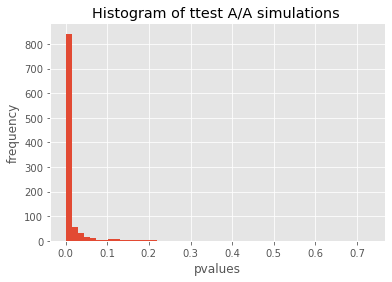

0.935

In [13]:
# посмотрим на варианты 0 и 1
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = hw_aa[hw_aa.experimentVariant == 0].purchase.sample(n_s, replace = False).values
    s2 = hw_aa[hw_aa.experimentVariant == 1].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
# pvalue слишком большое, посмотрим по версиям

  0%|          | 0/1000 [00:00<?, ?it/s]

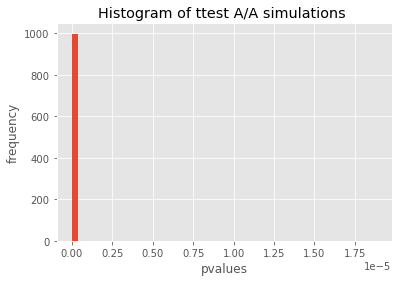

1.0

In [33]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = hw_aa[(hw_aa.experimentVariant == 0) & (hw_aa.version == 'v2.8.0')].purchase.sample(n_s, replace = False).values
    s2 = hw_aa[(hw_aa.experimentVariant == 1) & (hw_aa.version == 'v2.8.0')].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

  0%|          | 0/1000 [00:00<?, ?it/s]

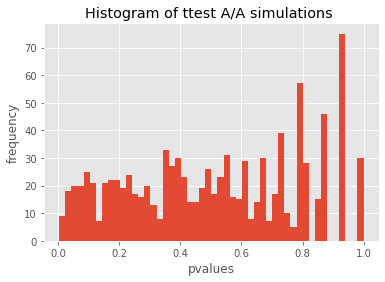

0.033

In [30]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = hw_aa[(hw_aa.experimentVariant == 0) & (hw_aa.version == 'v2.9.0')].purchase.sample(n_s, replace = False).values
    s2 = hw_aa[(hw_aa.experimentVariant == 1) & (hw_aa.version == 'v2.9.0')].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

  0%|          | 0/1000 [00:00<?, ?it/s]

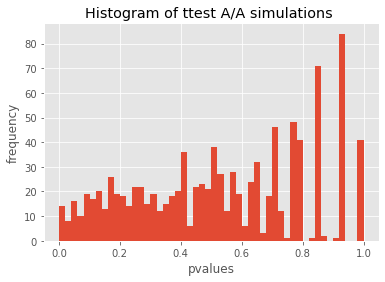

0.026

In [25]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = hw_aa[(hw_aa.experimentVariant == 0) & (hw_aa.version == 'v3.7.4.0')].purchase.sample(n_s, replace = False).values
    s2 = hw_aa[(hw_aa.experimentVariant == 1) & (hw_aa.version == 'v3.7.4.0')].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

  0%|          | 0/1000 [00:00<?, ?it/s]

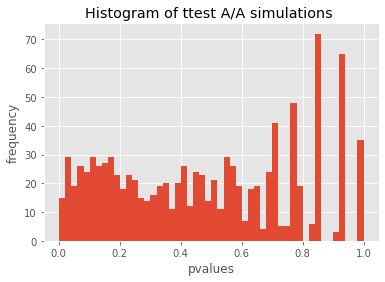

0.05

In [32]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = hw_aa[(hw_aa.experimentVariant == 0) & (hw_aa.version == 'v3.8.0.0')].purchase.sample(n_s, replace = False).values
    s2 = hw_aa[(hw_aa.experimentVariant == 1) & (hw_aa.version == 'v3.8.0.0')].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
# исключим из основного датафрейма версию v2.8.0, где pvalue 1.0

  0%|          | 0/1000 [00:00<?, ?it/s]

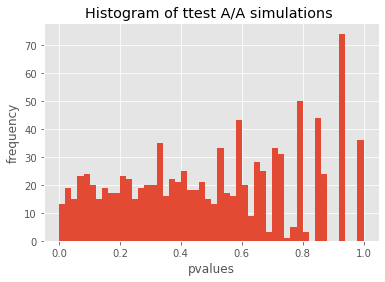

0.039

In [29]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = hw_aa[(hw_aa.experimentVariant == 0) & (hw_aa.version != 'v2.8.0')].purchase.sample(n_s, replace = False).values
    s2 = hw_aa[(hw_aa.experimentVariant == 1) & (hw_aa.version != 'v2.8.0')].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
# причина поломки в варианте 0 версия 2.8.0.